<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%203.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 3.3.1. Necessary and sufficient conditions of local minimizers**

**Key Mathematical Concepts**

1. *Global vs. Local Minimizers*: A global minimizer has the smallest function value across the entire domain, while a local minimizer only has the smallest value within a neighborhood around the point.

2. *Descent Direction*: A descent direction $v$ ensures that moving in that direction decreases the function value. Mathematically, this corresponds to having a negative directional derivative.

3. *First-Order Necessary Condition*: A necessary condition for $x_0$ to be a local minimizer is that the gradient $\nabla f(x_0) = 0$. This means that there is no direction of steepest descent from $x_0$.

4. *Second-Order Necessary and Sufficient Conditions*: The second-order necessary condition requires that the Hessian matrix at $x_0$ is positive semi-definite. If the Hessian is positive definite, it guarantees that $x_0$ is a strict local minimizer.

This demonstrates key mathematical concepts from section 3.3.1 using Python to visualize and compute these conditions.

***Global and Local Minimizers***

We first explore the concepts of global and local minimizers. For example, consider the function:

\
\begin{aligned}
f(x) = x^4 - 3x^3 + 2
\end{aligned}

\
We'll visualize the function and highlight its global and local minimizers.

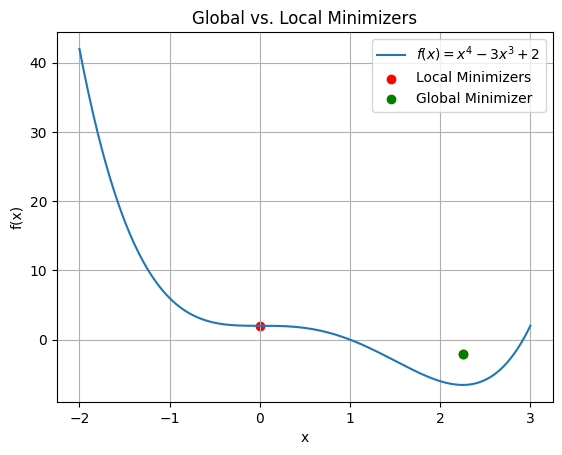

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**4 - 3*x**3 + 2

# Generate x values
x = np.linspace(-2, 3, 400)
y = f(x)

# Plot the function
plt.plot(x, y, label='$f(x) = x^4 - 3x^3 + 2$')
plt.title("Global vs. Local Minimizers")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Highlight local and global minimizers
plt.scatter([0, 2.25], [2, -2.14], color='red', label="Local Minimizers")
plt.scatter([2.25], [-2.14], color='green', label="Global Minimizer")
plt.legend()
plt.show()

This plot demonstrates the local minimizer at $x = 0$ and the global minimizer at $x \approx 2.25$.

***Descent Direction***

Next, we demonstrate how to find a descent direction. For example, consider the function:

\
\begin{aligned}
f(x_1, x_2) = x_1^2 + 2x_2^2
\end{aligned}

\
The gradient (∇f) gives us information about the descent direction.

In [2]:
import numpy as np

# Define the function
def f(x1, x2):
    return x1**2 + 2*x2**2

# Define the gradient
def gradient_f(x1, x2):
    return np.array([2*x1, 4*x2])

# Initial point
x0 = np.array([1.0, 1.0])

# Descent direction: negative of the gradient
v = -gradient_f(x0[0], x0[1])

print(f"Gradient at x0 = {x0}: {gradient_f(x0[0], x0[1])}")
print(f"Descent direction: {v}")

Gradient at x0 = [1. 1.]: [2. 4.]
Descent direction: [-2. -4.]


This program computes the descent direction $v = -\nabla f(x_0)$ at the initial point $x_0 = (1,1)$.

***First-Order Necessary Condition***

The first-order necessary condition states that the gradient must be zero at a local minimizer. We verify this for the function:

\
\begin{aligned}
f(x_1, x_2) = x_1^2 + x_2^2
\end{aligned}

In [3]:
# Check the gradient at a critical point (0, 0)
x_critical = np.array([0.0, 0.0])

# Gradient should be zero at the minimizer
grad_at_critical = gradient_f(x_critical[0], x_critical[1])
print(f"Gradient at x_critical = {x_critical}: {grad_at_critical}")

Gradient at x_critical = [0. 0.]: [0. 0.]


The gradient at $(0, 0)$ is zero, confirming that it is a critical point and a candidate for a local minimizer.

***Second-Order Necessary and Sufficient Conditions***

To apply second-order conditions, we need the Hessian matrix of the function $f(x_1, x_2) = x_1^2 + x_2^2$, which is:

\
\begin{aligned}
H_f(x_1, x_2) = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}
\end{aligned}

\
Since the Hessian is positive definite (all eigenvalues are positive), this confirms a strict local minimizer.

In [4]:
# Define the Hessian matrix of f(x1, x2) = x1^2 + x2^2
def hessian_f(x1, x2):
    return np.array([[2, 0], [0, 2]])

# Hessian at the critical point
H_at_critical = hessian_f(0, 0)

# Check if Hessian is positive definite
eigvals = np.linalg.eigvals(H_at_critical)
print(f"Hessian matrix at x_critical = (0, 0):\n{H_at_critical}")
print(f"Eigenvalues of Hessian: {eigvals}")

Hessian matrix at x_critical = (0, 0):
[[2 0]
 [0 2]]
Eigenvalues of Hessian: [2. 2.]


Since all eigenvalues are positive, the Hessian is positive definite, confirming a strict local minimizer at $(0, 0)$.

# **Section 3.3.2. Convexity and global minimizers**

**Key Mathematical Concepts**

1. **Convex sets and convex functions** (Definition 3.3.11, 3.3.13)
2. **First-order convexity condition** (Lemma 3.3.15)
3. **Second-order convexity condition** (Lemma 3.3.16)
4. **Global minimizers of convex functions** (Theorem 3.3.18, 3.3.19)

---

***Convex Sets and Convex Functions***

We will start by visualizing a convex set and a non-convex set. For convex functions, we will verify if a simple quadratic function $f(x) = x^2$ satisfies the convexity property.

**Example 1: Convex Set Visualization**

A set is convex if any two points within the set can be connected by a line that remains entirely within the set. An open ball is an example of a convex set.

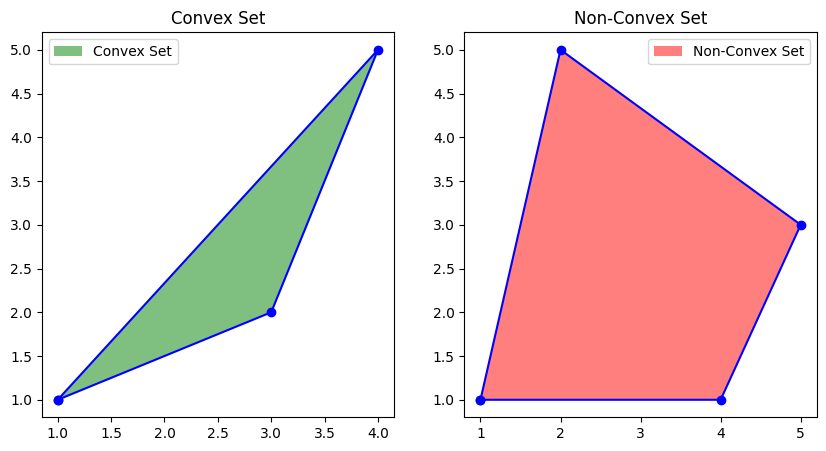

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define points in 2D space for convex and non-convex sets
convex_set_x = np.array([1, 3, 4, 1])
convex_set_y = np.array([1, 2, 5, 1])

non_convex_set_x = np.array([1, 4, 5, 2, 1])
non_convex_set_y = np.array([1, 1, 3, 5, 1])

# Plot convex set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.fill(convex_set_x, convex_set_y, 'g', alpha=0.5, label='Convex Set')
plt.plot(convex_set_x, convex_set_y, 'bo-')
plt.title('Convex Set')
plt.legend()

# Plot non-convex set
plt.subplot(1, 2, 2)
plt.fill(non_convex_set_x, non_convex_set_y, 'r', alpha=0.5, label='Non-Convex Set')
plt.plot(non_convex_set_x, non_convex_set_y, 'bo-')
plt.title('Non-Convex Set')
plt.legend()

plt.show()

**Example 2: Verifying Convexity of a Function**

We'll verify the convexity of the function $f(x) = x^2$, which is a well-known convex function.

In [6]:
# Define the function f(x) = x^2
def f(x):
    return x**2

# Verify convexity condition: f((1-α)x + αy) <= (1-α)f(x) + αf(y) for α ∈ [0, 1]
x = 1
y = 3
alpha = 0.5

lhs = f((1-alpha)*x + alpha*y)  # f((1-α)x + αy)
rhs = (1-alpha)*f(x) + alpha*f(y)  # (1-α)f(x) + αf(y)

print(f"LHS (f((1-α)x + αy)): {lhs}")
print(f"RHS ((1-α)f(x) + αf(y)): {rhs}")
print(f"Is the function convex? {'Yes' if lhs <= rhs else 'No'}")

LHS (f((1-α)x + αy)): 4.0
RHS ((1-α)f(x) + αf(y)): 5.0
Is the function convex? Yes



---

***First-order Convexity Condition***

We will use a linear function $f(x) = 3x + 2$ to illustrate the first-order condition. The first-order convexity condition states that $f(y) \geq f(x) + \nabla f(x)^T (y - x)$.

In [7]:
# Define the gradient of the linear function f(x) = 3x + 2
def gradient_f(x):
    return 3  # Since the gradient is constant for linear functions

# First-order condition
x = 1
y = 2

lhs = f(y)
rhs = f(x) + gradient_f(x) * (y - x)

print(f"LHS (f(y)): {lhs}")
print(f"RHS (f(x) + ∇f(x)T (y - x)): {rhs}")
print(f"First-order condition satisfied? {'Yes' if lhs >= rhs else 'No'}")

LHS (f(y)): 4
RHS (f(x) + ∇f(x)T (y - x)): 4
First-order condition satisfied? Yes


---

***Second-order Convexity Condition***

For a quadratic function $f(x) = \frac{1}{2} x^T P x + q^T x + r$, convexity depends on the positive semi-definiteness (PSD) of the Hessian matrix.

**Example 3: Quadratic Function Convexity**

We'll construct a quadratic function and check the PSD of its Hessian to demonstrate convexity.

In [8]:
# Define a quadratic function
P = np.array([[2, 0], [0, 2]])  # Positive definite matrix
q = np.array([0, 0])
r = 0

def quadratic_f(x):
    return 0.5 * np.dot(x.T, np.dot(P, x)) + np.dot(q.T, x) + r

# Check if Hessian is PSD (P matrix is PSD)
eigenvalues = np.linalg.eigvals(P)
print(f"Eigenvalues of Hessian (P): {eigenvalues}")
print(f"Is the Hessian PSD? {'Yes' if np.all(eigenvalues >= 0) else 'No'}")

Eigenvalues of Hessian (P): [2. 2.]
Is the Hessian PSD? Yes


---

***Global Minimizers of Convex Functions***

For convex functions, a global minimizer is found where the gradient is zero. We'll show this with a quadratic function.

**Example 4: Finding the Global Minimizer**

We will find the global minimizer for $f(x) = \frac{1}{2} x^T P x + q^T x + r$.

In [9]:
# Find the global minimizer by solving Px + q = 0
P_inv = np.linalg.inv(P)
x_min = -np.dot(P_inv, q)

print(f"Global minimizer x*: {x_min}")

Global minimizer x*: [-0. -0.]


---

These examples demonstrate how convexity, gradients, and Hessians relate to optimization and minimization in convex functions. The visualizations and code illustrate key concepts from section 3.3.2.

# **Section 3.3.3. Gradient Descent**

**Key Mathematical Concepts**

1. **Basic Gradient Descent Algorithm** - Demonstrating how gradient descent iteratively approaches a local minimum.
2. **Least Squares Problem** - Solving a least-squares optimization problem using gradient descent.
3. **Steepest Descent** - Implementing steepest descent with an optimal step size for the given function.

***Gradient Descent Algorithm***

In this example, we will implement a basic gradient descent algorithm to minimize a simple quadratic function $f(x) = (x-3)^2$. The goal is to show how the algorithm iteratively approaches the minimum of the function.

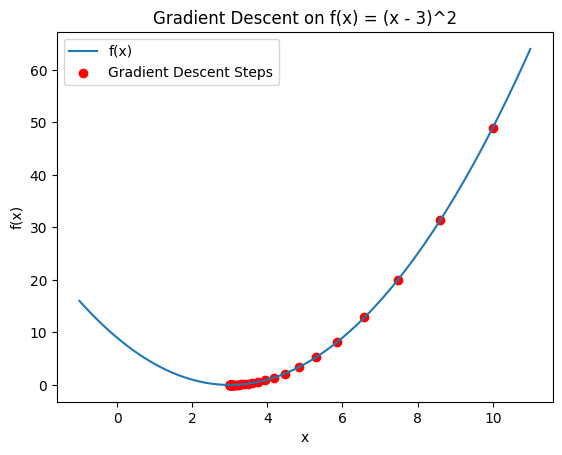

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x):
    return (x - 3)**2

def grad_f(x):
    return 2 * (x - 3)

# Gradient descent parameters
x0 = 10  # Initial guess
learning_rate = 0.1
num_iterations = 50

# Gradient descent algorithm
x = x0
x_values = [x0]
for i in range(num_iterations):
    x = x - learning_rate * grad_f(x)
    x_values.append(x)

# Plotting the results
x_range = np.linspace(-1, 11, 400)
plt.plot(x_range, f(x_range), label='f(x)')
plt.scatter(x_values, f(np.array(x_values)), color='red', label='Gradient Descent Steps')
plt.title('Gradient Descent on f(x) = (x - 3)^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

**Explanation:**

This code implements the basic gradient descent algorithm. The function being minimized is $f(x) = (x-3)^2$, which has a global minimum at $x = 3$. The gradient $\nabla f(x) = 2(x-3)$ is used to iteratively update the guess for $x$. The red points on the plot show the steps taken by the gradient descent algorithm as it converges towards the minimum.

***Gradient Descent for Least Squares Problem***

We solve a least-squares problem of the form:

\
\begin{aligned}
\min_x \|Ax - b\|^2
\end{aligned}

\
Using gradient descent, we will minimize this objective.

In [11]:
# Define the least squares problem
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([7, 8, 9])

# Define the function and its gradient
def f_least_squares(x):
    return np.linalg.norm(A @ x - b)**2

def grad_f_least_squares(x):
    return 2 * A.T @ (A @ x - b)

# Gradient descent parameters
x0 = np.array([0, 0])  # Initial guess
learning_rate = 0.01
num_iterations = 100

# Gradient descent algorithm
x = x0
x_values = [x0]
for i in range(num_iterations):
    x = x - learning_rate * grad_f_least_squares(x)
    x_values.append(x)

# Final solution
print("Solution found by Gradient Descent:", x)

Solution found by Gradient Descent: [-1.96526065  3.31480299]


**Explanation:**

This example demonstrates how gradient descent can be used to solve a least-squares optimization problem. We defined $A \in \mathbb{R}^{3 \times 2}$ and $b \in \mathbb{R}^3$, and we minimized the function $f(x) = \|Ax - b\|^2$. The algorithm iterates and finds an approximate solution for $x$ that minimizes the least-squares problem.

***Steepest Descent***

For the steepest descent method, we implement an algorithm where the step size $\alpha_k$ is chosen to minimize $f(x_k - \alpha \nabla f(x_k))$ at each iteration.

In [13]:
import numpy as np

# Define the quadratic function and its gradient
def f_quadratic(x):
    return 0.5 * x.T @ Q @ x + b.T @ x + c

def grad_f_quadratic(x):
    return Q @ x + b

# Define step size calculation
def step_size(x):
    grad = grad_f_quadratic(x)
    denom = grad.T @ Q @ grad
    if np.abs(denom) < 1e-8:  # To avoid division by zero
        return 0
    return (grad.T @ grad) / denom

# Define parameters for the quadratic function
Q = np.array([[2, 0], [0, 4]])  # Positive definite matrix
b = np.array([-8, -12])
c = 10

# Gradient descent parameters
x0 = np.array([0.1, 0.1])  # Adjusted initial guess
num_iterations = 50
tolerance = 1e-6  # Stopping criterion based on the gradient norm

# Steepest descent algorithm
x = x0
x_values = [x0]
for i in range(num_iterations):
    alpha = step_size(x)
    if alpha == 0:  # Stop if step size becomes zero
        break
    x = x - alpha * grad_f_quadratic(x)
    x_values.append(x)

    # Stopping criterion
    if np.linalg.norm(grad_f_quadratic(x)) < tolerance:
        break

# Final solution
print("Solution found by Steepest Descent:", x)

Solution found by Steepest Descent: [3.99998646 3.00000455]


**Explanation:**

In this example, we minimize a quadratic function $f(x) = 0.5 x^T Q x + b^T x + c$, where $Q$ is a positive definite matrix. The steepest descent algorithm dynamically calculates the step size $\alpha_k$ to minimize the objective at each iteration. The optimal solution is reached after a series of iterations.

---

These examples illustrate the key concepts of gradient descent and steepest descent as iterative optimization techniques. The first example shows a simple quadratic function minimization, while the second and third examples apply gradient descent to more complex functions, such as a least-squares problem and a quadratic function.